### Importing Libraries

In [438]:
import cv2
import numpy as np
import imageio as iio
from matplotlib import pyplot as plt

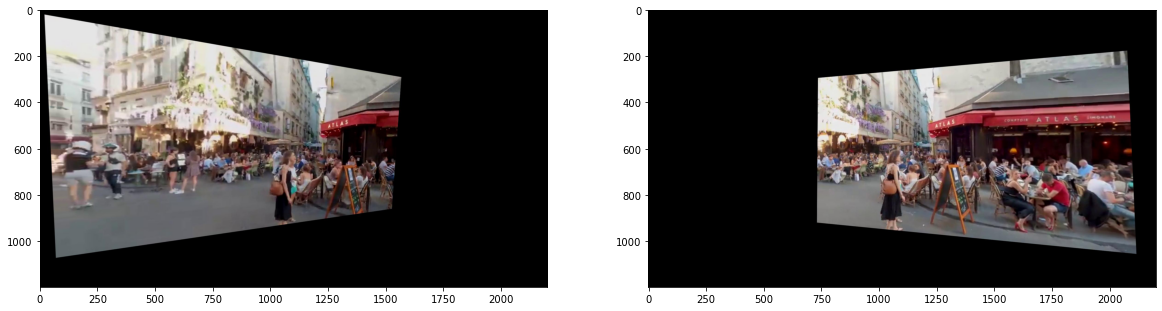

In [439]:
left = iio.imread("q2_0.jpg")
right = iio.imread("q2_1.jpg")
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(left)
plt.subplot(122)
plt.imshow(right);

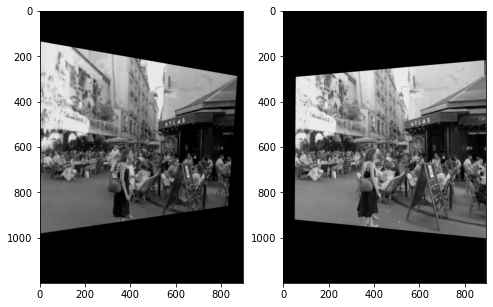

In [571]:
s = 695#755
l = 1590#1608
d = -15
left_croped = cv2.cvtColor(left[:,s:l], cv2.COLOR_BGR2GRAY).astype("float64")
right_croped =  cv2.cvtColor(right[:,s+d:l+d], cv2.COLOR_BGR2GRAY).astype("float64")
plt.figure(figsize=(8,10))
plt.subplot(121)
plt.imshow(left_croped.astype("uint8"),cmap="gray")
plt.subplot(122)
plt.imshow(right_croped.astype("uint8"),cmap="gray");

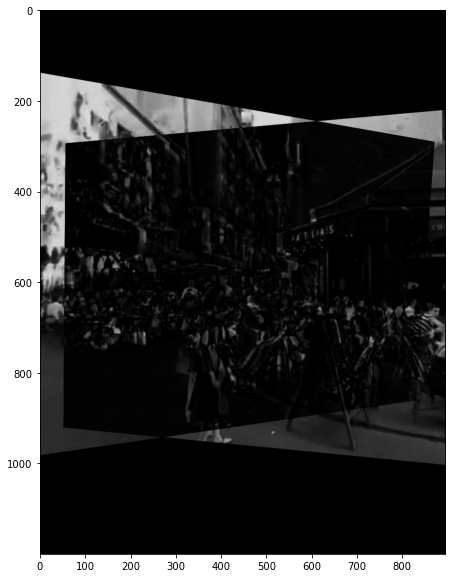

In [572]:
diff = abs(left_croped - right_croped)**2
#diff = (diff-np.min(diff))/(np.max(diff)-np.min(diff))*255
plt.figure(figsize=(10,10))
plt.imshow(diff,cmap="gray");

In [573]:
def get_min_border(img):
    m,n = img.shape
    out = np.zeros((m,n)) # path itself
    costs = np.zeros((m,n),dtype=int) # cost till the node
    last = np.zeros((m,n)) # -1, 0, 1
    for i in range(m):
        for j in range(n):
            if(i>0):
                if (j==0):
                    costs[i,j] = img[i,j]+ min(costs[i-1,j],costs[i-1,j+1])
                elif (j==n-1):
                    costs[i,j] = img[i,j]+ min(costs[i-1,j],costs[i-1,j-1])
                else:
                    k = np.argmin(costs[i-1,j-1:j+2])
                    if j+k < n-1 and costs[i-1,j-1+k] == costs[i-1,j+k]:
                        k += 1
                    costs[i,j] = img[i,j]+costs[i-1,j-1+k]
                    last[i,j] = k-1
    l = np.argmin(costs[m-1,:])
    out[m-1,l] = 1
    for i in range(2,m):
        k = last[m-i+1,l]
        l = int(l+k)
        out[m-i,l] = 1
    return out.astype("uint8")

In [574]:
path = get_min_border(diff)
iio.imwrite("q2_path.png",255*path)

In [575]:
mask = np.zeros(left.shape[:2])
for i in range(path.shape[0]):
    k = np.argmax(path[i,:])
    mask[i,:s+k] = 1
mask = np.dstack((mask,mask,mask)).astype("uint8")
iio.imwrite("q2_path_mask.png",255*mask)

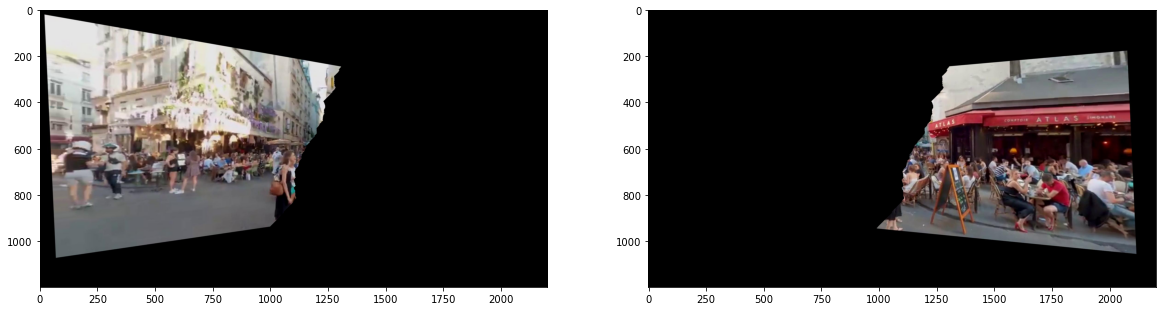

In [576]:
img1 = left*mask
img2 = right*(1-mask)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img1.astype("uint8"))
plt.subplot(122)
plt.imshow((img2).astype("uint8"));

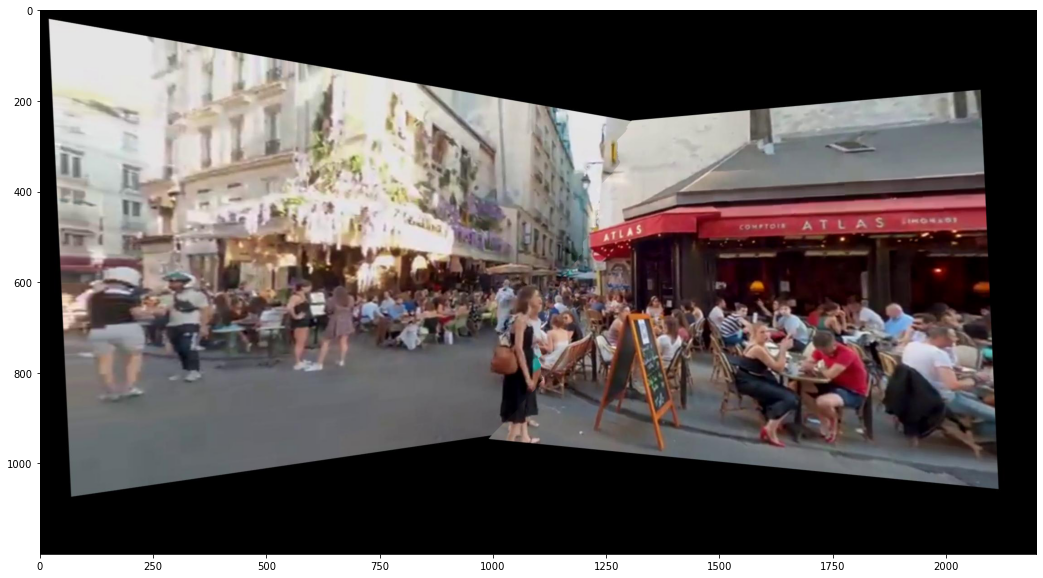

In [577]:
plt.figure(figsize=(20,10))
plt.imshow((img1+img2).astype("uint8"))